In [4]:
import numpy as np
import common_methods as com
import matplotlib.pyplot as plt

In [2]:
nx = 250
ny = 250
nt = 8
dt = 0.003
noise_level = 0
downsample_by = 5
batch_size = 24

In [20]:
nu = 10e-2

dx = 2*np.pi/(nx - 1)
dy = 2*np.pi/(ny - 1)

In [19]:
dx

0.025233675932448137

In [14]:
# Needed for plotting:
x = np.linspace(0, 2*np.pi, num = nx)
y = np.linspace(0, 2*np.pi, num = ny)
X, Y = np.meshgrid(x, y)

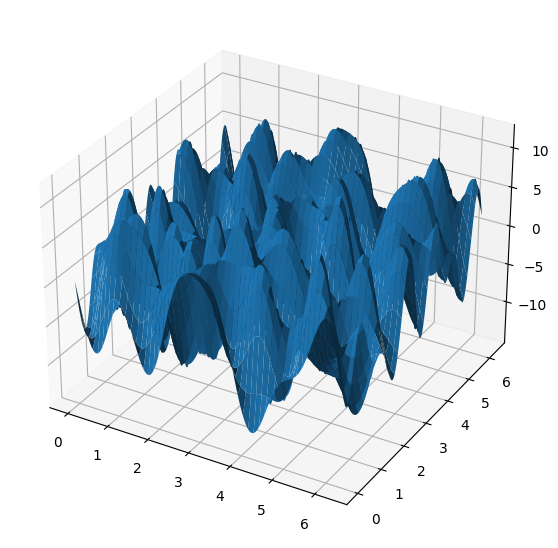

In [15]:
batch = []

for i in range(batch_size):
    ########################### Change the following lines to implement your own data ###########################

    ## Assign initial function:
    u = com.initgen([250,250], freq=4, boundary='Periodic')

    # Plotting the initial function:
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:])
    
    plt.show()

    sample = {}
    sample['u0'] = u

    for n in range(nt - 1):
        un = com.pad_input_2(u, 2)[1:, 1:]  # Same triplet of numbers on each side

        u = (un[1:-1, 1:-1] + dt * (nu*(un[2:, 1:-1] + un[0:-2, 1:-1] - 2*un[1:-1, 1:-1]) / dx**2
                                    - un[1:-1, 1:-1] * (un[2:, 1:-1] - un[1:-1, 1:-1]) / dx))[:-1, :-1]

        sample['u' + str(n+1)] = u
        break
    break


    ## sample should at this point be a dictionary with entries 'u0', ..., 'uL', where L = nt                   ##
    ## For a given j, sample['uj'] is a matrix of size nx x ny containing the function values at time-step dt*j ##
    ##############################################################################################################


    # # Plotting the function values from the last layer:
    # fig2 = plt.figure()
    # ax2 = fig2.gca(projection='3d')
    # surf2 = ax2.plot_surface(X, Y, u, cmap=cm.viridis)
    #
    # plt.show()

    com.downsample(sample, downsample_by)
    com.addNoise(sample, noise_level, nt)

    batch.append(sample)

In [16]:
sample

{'u0': array([[ 0.38339621, -0.25607956, -0.91007709, ...,  2.15053657,
          1.59277891,  1.00177209],
        [-0.47000169, -1.1009071 , -1.73464083, ...,  1.34353945,
          0.75826988,  0.15177655],
        [-1.32478998, -1.94276526, -2.55157635, ...,  0.52429188,
         -0.08527857, -0.70362598],
        ...,
        [ 2.75864315,  2.1173232 ,  1.4307086 , ...,  4.34328339,
          3.87758669,  3.34752577],
        [ 2.01506391,  1.37068292,  0.69031058, ...,  3.66544536,
          3.16847237,  2.61645345],
        [ 1.21762575,  0.57374806, -0.09578766, ...,  2.92962266,
          2.40162907,  1.8290334 ]]),
 'u1': array([[ 0.38437203, -0.25673309, -0.91233142, ...,  2.15573463,
          1.59675877,  1.00431977],
        [-0.47120736, -1.10368664, -1.73888981, ...,  1.34683785,
          0.76018608,  0.15216442],
        [-1.32811822, -1.94754558, -2.55763009, ...,  0.52557613,
         -0.08549021, -0.70540328],
        ...,
        [ 2.76477597,  2.12204579,  1.4338

In [17]:
un

array([[ 1.8290334 ,  1.21762575,  0.57374806, ...,  1.8290334 ,
         1.21762575,  0.57374806],
       [ 1.00177209,  0.38339621, -0.25607956, ...,  1.00177209,
         0.38339621, -0.25607956],
       [ 0.15177655, -0.47000169, -1.1009071 , ...,  0.15177655,
        -0.47000169, -1.1009071 ],
       ...,
       [ 1.8290334 ,  1.21762575,  0.57374806, ...,  1.8290334 ,
         1.21762575,  0.57374806],
       [ 1.00177209,  0.38339621, -0.25607956, ...,  1.00177209,
         0.38339621, -0.25607956],
       [ 0.15177655, -0.47000169, -1.1009071 , ...,  0.15177655,
        -0.47000169, -1.1009071 ]])